# Questoin 1
- Using enron dataset perform 3 analysis

In [1]:
import os
import glob
from email.parser import Parser
import email.utils
import csv
import operator
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [2]:
current_path =os.path.expanduser('~')
current_path =os.path.join(current_path,'midterm')
current_path =os.path.join(current_path,'data')
current_path =os.path.join(current_path,'enron')
current_path =os.path.join(current_path,'maildir')
print(current_path)

C:\Users\jaina\midterm\data\enron\maildir


In [3]:
def create_path(path):      #recursive function to traverse the path for directories 
    for entry in os.scandir(path):
        #print(path)
        if not entry.name.startswith('.') and entry.is_dir():
            add_path = entry.name
            appendedPath = os.path.join(path, add_path)
            path_list.append(appendedPath)
            create_path(appendedPath)

In [4]:
path_list = []
path_list = list(set(path_list))
create_path(current_path)

In [5]:
def plot_graph(year,xvalues,yvalues):    #function to plot the graph for each year and each month mail count having paramter year, months and count
    fig, ax = plt.subplots(figsize=(10,5))
    plt.bar(xvalues,
        #using df['pre_score'] data,
        yvalues,
        # of width
        width = 0.25,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#54c1b7',
        # with label the first value in first_name
        label='February')


    # Set the y axis label
    ax.set_ylabel('Number of Emails Sent')
    # Set the x axis label
    ax.set_xlabel('Months')

    #Setting the x-axis and y-axis limits
    plt.xlim(1,12)
    plt.ylim(0,3000)

    # Set the chart's title
    ax.set_title('Emails Sent in '+str(year))
    #xTickMarks = ['February', 'March']
    #width = 2
    ax.set_xticks([p for p in xvalues])
    #xtickNames = ax.set_xticklabels(xTickMarks)
    #plt.setp(xtickNames, rotation=45, fontsize=10)

    # Adding the legend and showing the plot
    #plt.legend(['Baseketball', 'Baseball','Football'], loc='upper right')
    #plt.grid()
    plt.savefig('Emails_SentIn_'+str(year)+'.png')
    plt.show()
    

# Analysis 1 
- with the data available , calculating the number of mails sent for each year and each month

1999


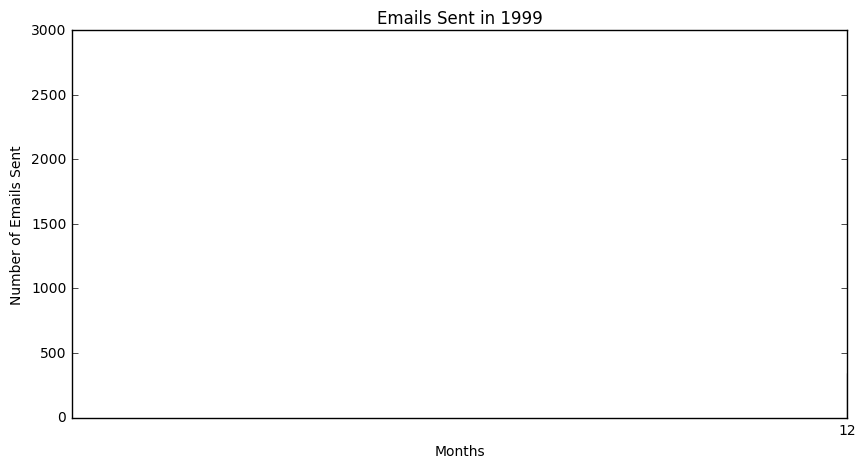

2000


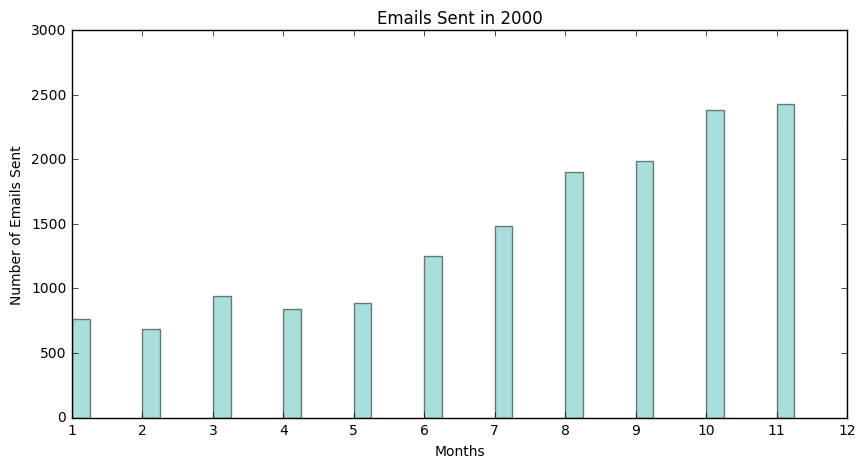

2001


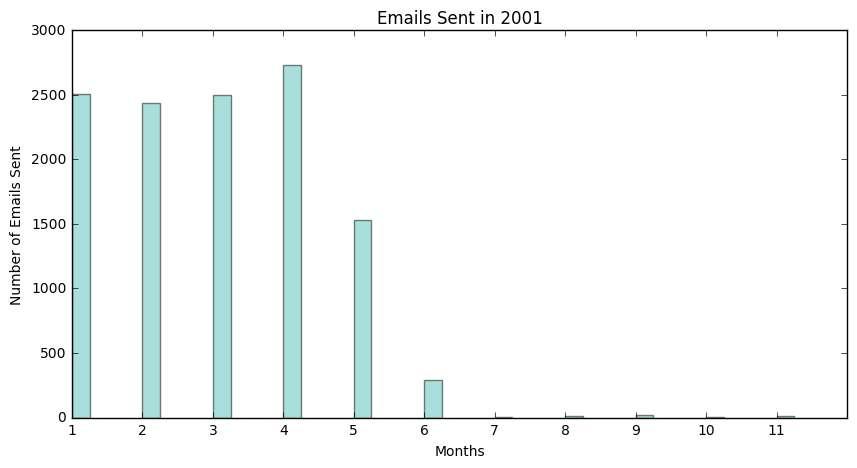

2002


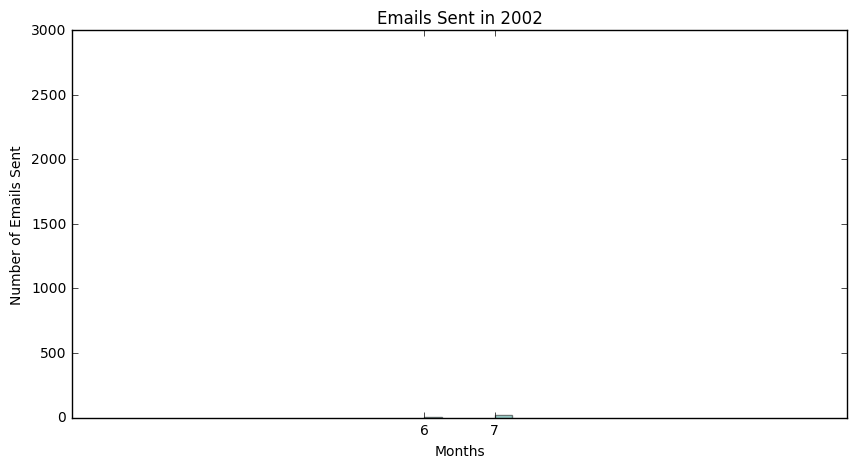

In [6]:
year_list = []
email_year = {}
content =''
for path in path_list:                    #loop through all the paths in path list
    if path.endswith('\_sent_mail'):      #selecting only sent_mail folder              
        x = glob.glob(path+ '\\' + '*')   #gives the list of file in that directory
        #print(x)
        for file in x:                    #loop through all the files that diretory
            #print(file)
            if os.path.isfile(file): 
                with open(file, "r") as f:
                    new = f.read()
                    email_data= Parser().parsestr(new)      #convert the data into email format
                    
                    ########## count of emails for each year and each month ################
                    time_stamp = email.utils.parsedate(email_data['date'])    #gives the date of mail as tuple(year, month, date, hour, min, sec)
                    #print(date[0])
                    year_list.append(time_stamp[0])
                    year = time_stamp[0]
                    month = time_stamp[1]
                    if year not in email_year:                  #storing the count of emails for each year and each month in dictionary
                        email_year[year] = {}
                        email_year[year][month] = 1
                        email_year[year]['count'] = 1
                    else:
                        email_year[year]['count'] += 1
                        if month not in email_year[year]:
                            email_year[year][month] = 1
                        else:
                            email_year[year][month] += 1
                                               
email_year_sorted = sorted(email_year) #sorting the dictionary based on key
#print(email_year_sorted)
for y in email_year_sorted:
    #print(y)
    temp = {}    #list to store the value(month:count, totalsent:count) of each year
    temp = email_year[y]
    temp.pop('count', None)   #pop removes the key count from the dictionary temp
    temp1 = sorted(temp) #sorting the dictionary to have months in list in ascending order
    #print(temp1)
    mail_count = []
    for m in temp1:           #loop through all the months for that year
        mail_count.append(email_year[y][m])
    plot_graph(y,temp1,mail_count) #plot the graph for each year
    #print(mail_count)

# Analysis 2
- From the results of analysis 1, it was observed that there was sudden increase in the number of mails exchanged from the end of year 2000 till the few initial months of 2001
- Considering these months with months , I calculated the top employees who sent these email and how many.
- Post the above analysis, I calculated the number of emails and to whom these were sent.

In [7]:
email_to_from ={}
email_subject = ''
for path in path_list:
    if path.endswith('\_sent_mail'):
                
        x = glob.glob(path+ '\\' + '*')
        #print(x)
        for file in x:
            #print(file)
            if os.path.isfile(file): 
                with open(file, "r") as f:
                    new = f.read()
                    email_data= Parser().parsestr(new)
                    email_date = email.utils.parsedate(email_data['date'])
                    year = email_date[0]
                    month = email_date[1]
                    month_2000 = [8,9,10,11,12]  #list of months of 2000 which highest sent mails based on analysis 1
                    month_2001 = [1,2,3,4,5]     #list of months of 2001 which highest sent mails based on analysis 1
                    if (year == 2000 and month in month_2000) or (year == 2001 and month in month_2001):
                        #print(file)
                        email_subject = email_subject + email_data['subject']   #make a string of subject of all the emails
                        
                        email_to = email_data['to']
                        email_from = email_data['from']
                        global email_to_from
                        #creating a dictionary of who sent the emails to whom and how much
                        if email_from not in email_to_from:   
                            email_to_from[email_from] = {}
                            if email_to is not None:         #email_to field should not be empty
                                if',' in email_to:           # if there are multiples emails in 'To'
                                    email_to.replace('/n','')
                                    email_to_list = email_to.split(',')
                                    email_to_1 = []
                                    for x in email_to_list:
                                        x = x.strip()       #trim the emails to remove extra spaces 
                                        email_to_1.append(x)
                                    for emails in email_to_1:
                                        if emails not in email_to_from[email_from]:
                                            email_to_from[email_from][emails] = 1
                                        else:
                                            email_to_from[email_from][emails] += 1
                                else:
                                     email_to_from[email_from][email_to] = 1
                            email_to_from[email_from]['count'] = 1
                        else:
                            email_to_from[email_from]['count'] += 1
                            if email_to is not None:
                                if',' in email_to:
                                    email_to.replace('/n','')
                                    email_to_list = email_to.split(',')
                                    email_to_1 = []
                                    for x in email_to_list:
                                        x = x.strip()
                                        email_to_1.append(x)
                                    for emails in email_to_1:
                                        if emails not in email_to_from[email_from]:
                                            email_to_from[email_from][emails] = 1
                                        else:
                                            email_to_from[email_from][emails] += 1
                                else:
                                    if email_to not in email_to_from[email_from]:
                                        email_to_from[email_from][email_to] = 1
                                    else:
                                        email_to_from[email_from][email_to] += 1
                                        
#print(email_to_from)
#print(email_subject)
OutputFile = open ('WhoSentMostEmail2.csv', 'wt', newline = '' , encoding='utf-8') #create and open CSV file in wirte mode
recordwriter = csv.writer(OutputFile)
recordwriter.writerow(['Email ID' , 'No Of Mails Sent' ] )  #write the header in csv
key_totalCount = {}  #containing the name and total mails sent by that person
for key in email_to_from:
    if key not in key_totalCount:
        key_totalCount[key] = email_to_from[key]['count']
#print(key_totalCount)
sorted_keyList = [] #list containing names in descending order based on total count of emails sent 
sorted_keyList = sorted(key_totalCount, key=key_totalCount.__getitem__ , reverse= True) #sorting the dictionary based on total count for each person 
#print(sorted_keyList)
    
for name in sorted_keyList:
    recordwriter.writerow([name , key_totalCount[name]] )  #write the records in csv
    
OutputFile.close()

In [8]:
#top 10 to whom he sent the most emails
OutputFile1 = open ('EmailSentFrom_To.csv', 'wt', newline = '' , encoding='utf-8') #create and open CSV file in wirte mode
recordwriter = csv.writer(OutputFile1)
recordwriter.writerow(['Email ID(From)' , 'Email ID(To)' ,'No Of Mails Sent' ] )
for name in sorted_keyList[:10]:
    sent_emails_to = email_to_from[name]   #stores to whom and how much emails were sent for name in sorted list
#print(sent_emails_to)
    sent_emails_to.pop('count', None)
    sorted_List1 = []
    sorted_List1 = sorted(sent_emails_to, key=sent_emails_to.__getitem__ , reverse= True)
    for to_name in sorted_List1[:10]:
        recordwriter.writerow([name , to_name, sent_emails_to[to_name]] )
        #print(to_name , sent_emails_to[to_name])
OutputFile1.close()

# Analysis 3
- Based on the results obtained from the above 2 analyses, I foccused on the mails sent during that period between the employees who have sent the most number of mails and computed the word frequency for most common topics these mails talked about and created a Word Cloud.

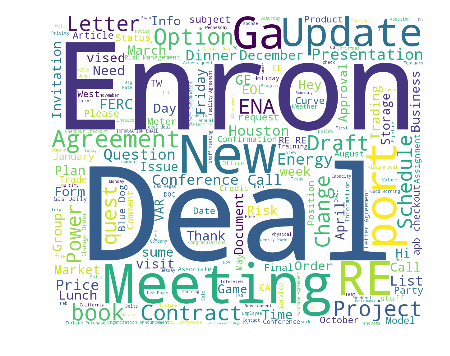

In [9]:
email_subject = email_subject.replace('Re', '')    #replace replaces the word from the string
email_subject = email_subject.replace('FW', '')
email_subject = email_subject.replace('Fw', '')
email_subject = email_subject.replace('Fwd', '')
#print(email_subject)

wordcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=1200,
                          height=1000
                         ).generate(email_subject)


plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('CommonTopics.png')
plt.show()